## Задание:  
Таблица содержит 11 столбцов чисел. Первые 10 столбцов - входные переменные (x_1 , …. , x_10), 11-й столбец - выходная прогнозируемая переменная y. Каждая строка в файле - это один обучающий пример для построения статистической модели для зависимости y = y(x_1,x_2,..,x_10). Конкретный вид связи между выходной и входными переменными не известен.
Требуется провести разведочный анализ данных, выбрать критерий для точности модели, и указать степень важности (информативности) каждой из 10 входных переменных с точки зрения точности модели. Что еще можно предложить чтобы улучшить получившийся результат? 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from seaborn import pairplot
from sklearn import linear_model,  ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [16]:
#file download
df = pd.read_csv('preliminary_task.txt', sep = '\t', header=None, names = ['x'+str(i) for i in range(1,11)]+['y'], index_col=False)

In [3]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.490491,0.499785,0.496466,0.503167,0.508902,0.513466,0.487111,0.498870,0.505611,0.499113,15.014000
std,0.293920,0.278833,0.298024,0.284102,0.283300,0.291059,0.288407,0.285954,0.283131,0.284073,4.771223
min,0.000188,0.000085,0.003110,0.001223,0.005314,0.000517,0.000493,0.000408,0.007883,0.000170,3.000000
25%,0.218825,0.262168,0.231492,0.268925,0.274572,0.255524,0.237778,0.256103,0.262332,0.249675,12.000000
50%,0.504439,0.500901,0.484347,0.503412,0.508629,0.527155,0.475274,0.501300,0.518847,0.509422,15.000000
75%,0.738004,0.734516,0.764729,0.747587,0.742461,0.766870,0.738885,0.736849,0.748473,0.741870,18.000000
max,0.999566,0.999959,0.998918,0.998785,0.998478,0.999059,0.999179,0.998646,0.998884,0.998819,29.000000


First we use the describe() method of data frame to take a closer look at our data. As we can see, our data is full and no variable has any missing values. x_i varies in the interval (0, 1) and has a mean of approximately 0.5, percentages of 25, 50 and 75 percent have values around 0.25, 0.5 and 0.75 respectively. Considering this and a pairplot below, we can conclude that x_i are random values from 0 to 1 and are close to be evenly distributed. As for y, its values are integer and are not evenly distributed, but rather look normal.

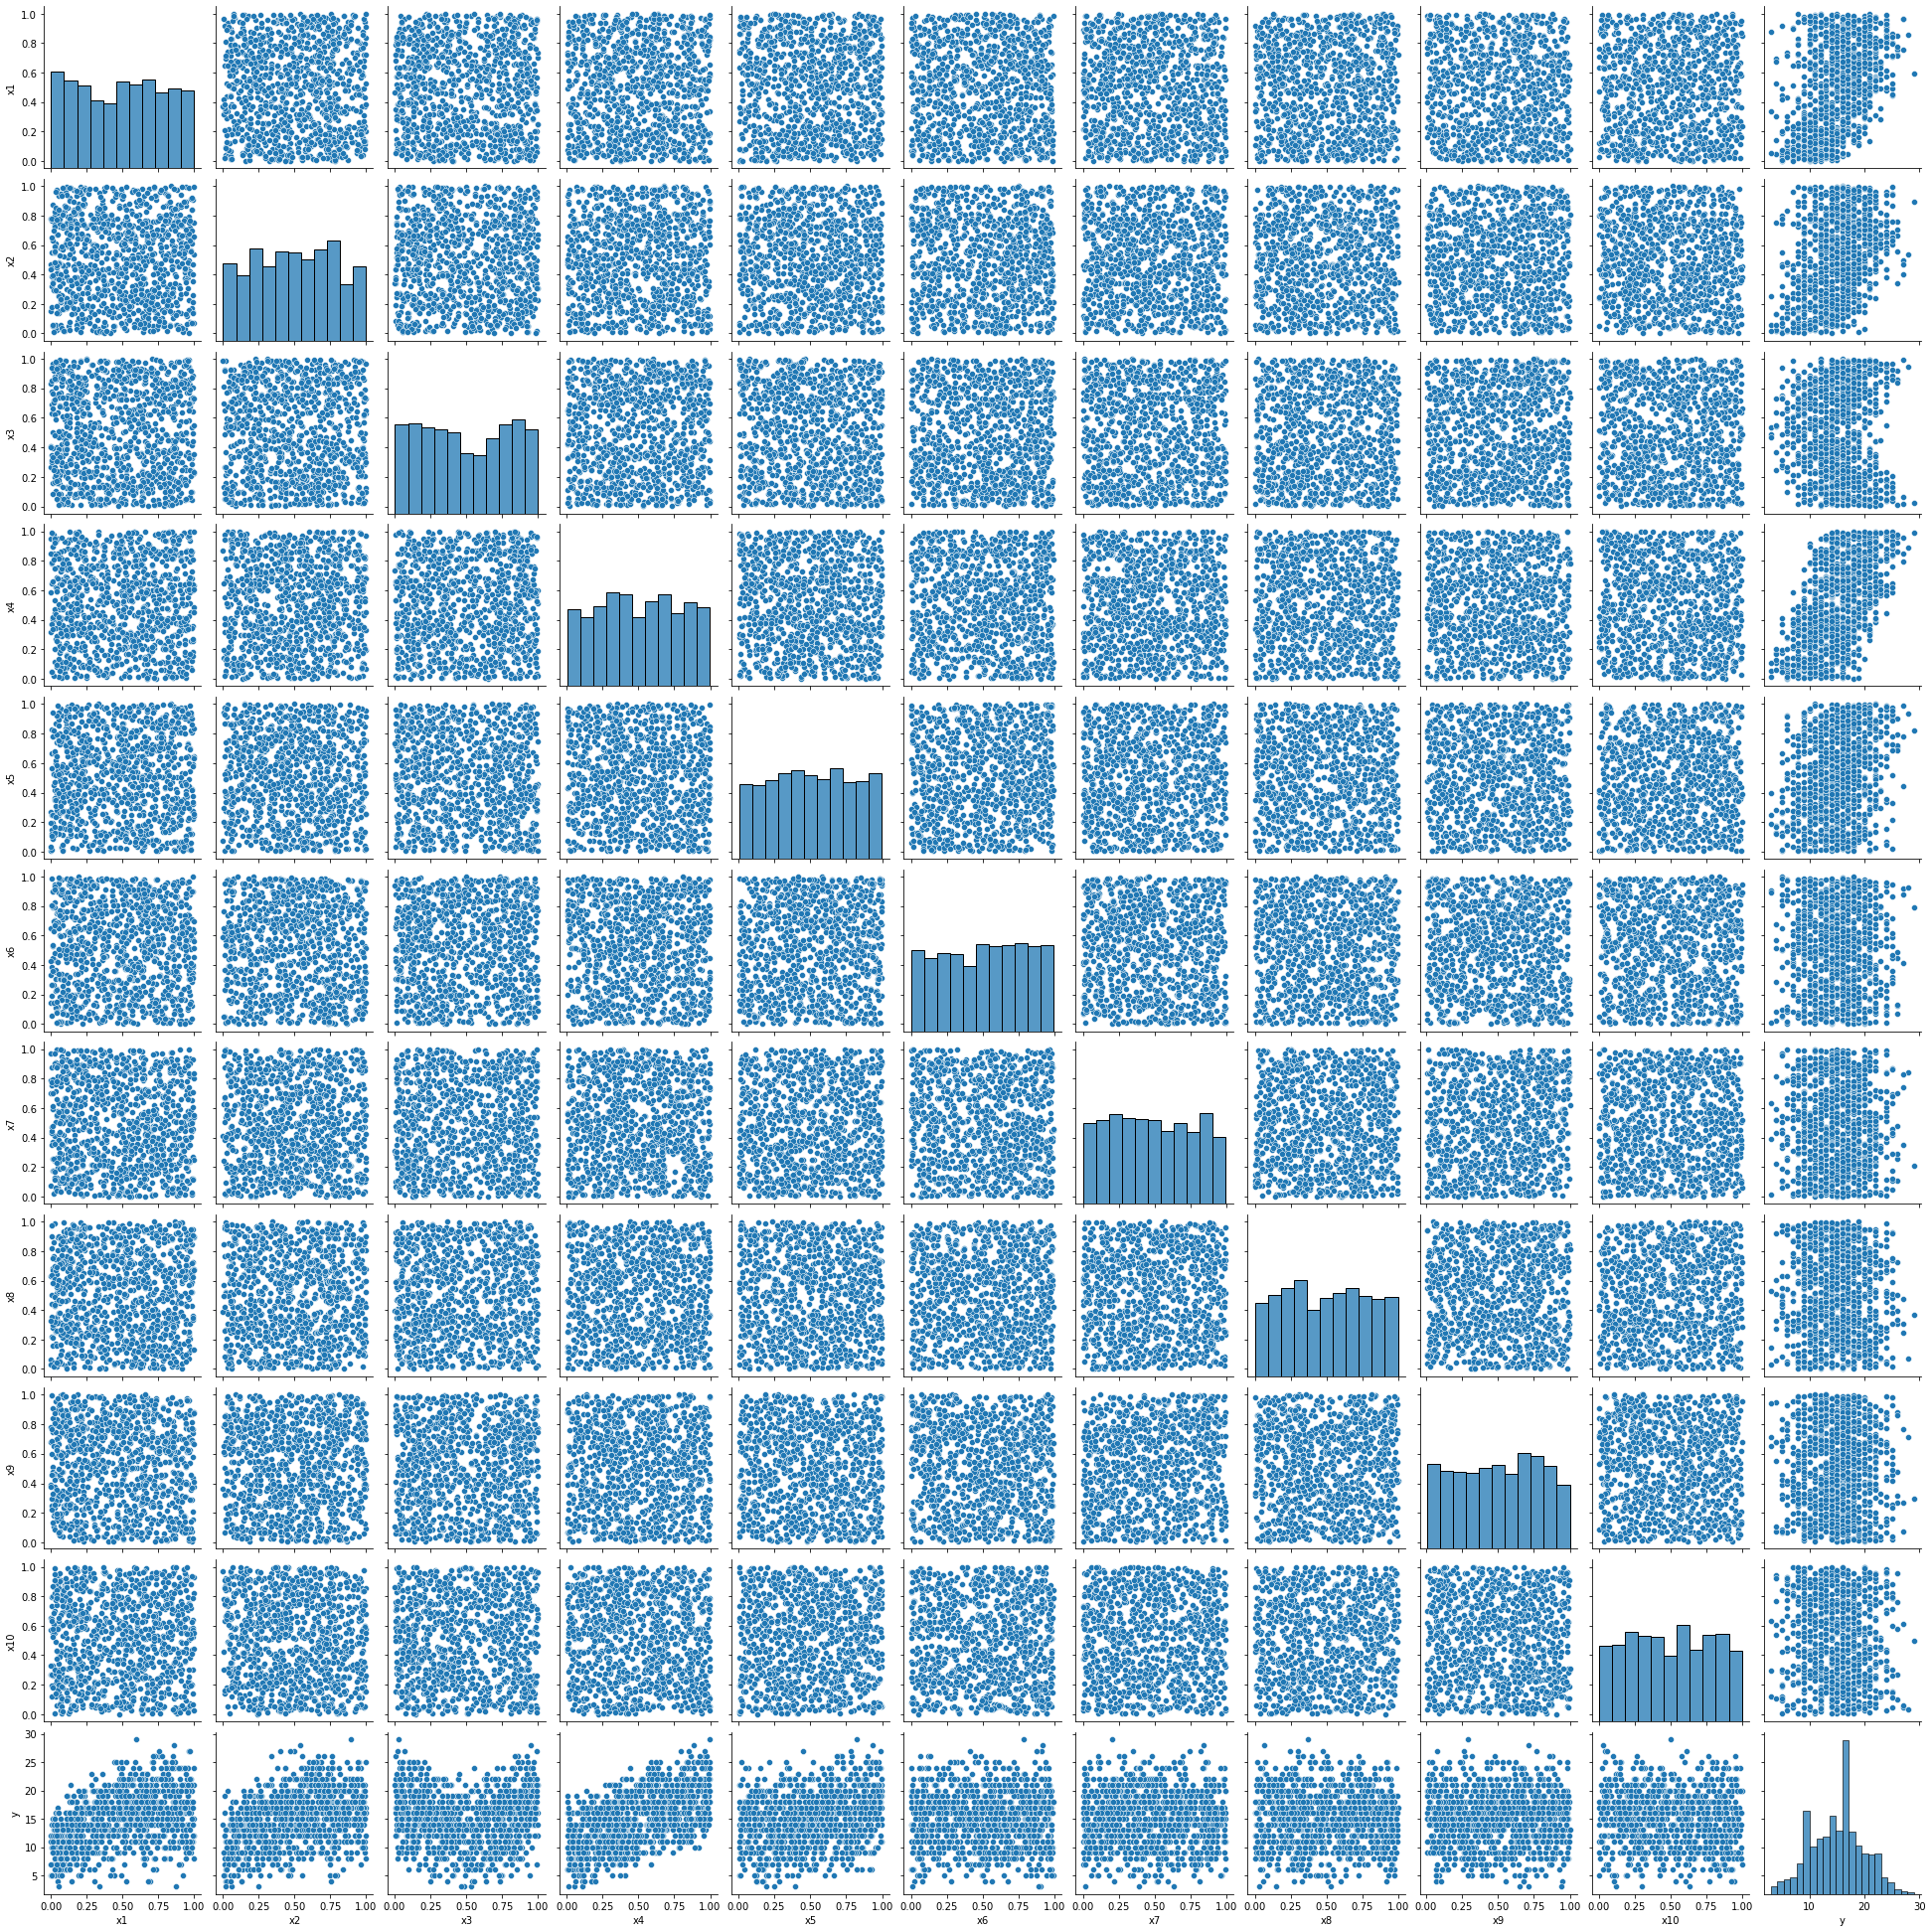

In [4]:
pairplot(df)

To understand the correlation between y and x_i variables, we should build a linear regression model. For the evalution we will use simple measures: mean stadart error and R-squared (coefficient of determination). R-squared provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. Closer the R-squared to 1, better the model.

We separate our x_i and y variable into different dataframes. For the regression we will use 95% of data, and use the remaining 5% for tests.

In [17]:
data_x = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']]
data_y = df['y']

In [6]:
data_x_regr = data_x[:-50]
data_x_test = data_x[-50:]

data_y_regr = data_y[:-50]
data_y_test = data_y[-50:]

Evaluating b coefficients...

In [7]:
linregr = linear_model.LinearRegression()
linregr.fit(data_x_regr, data_y_regr)

linregr.coef_

array([ 7.25705761,  6.78024085, -0.27195349,  9.75297828,  5.17078102,
        0.12544406, -0.11233498,  0.03491824, -0.32081909, -0.32005118])

Let us build a plot of coefficients for better comprehension

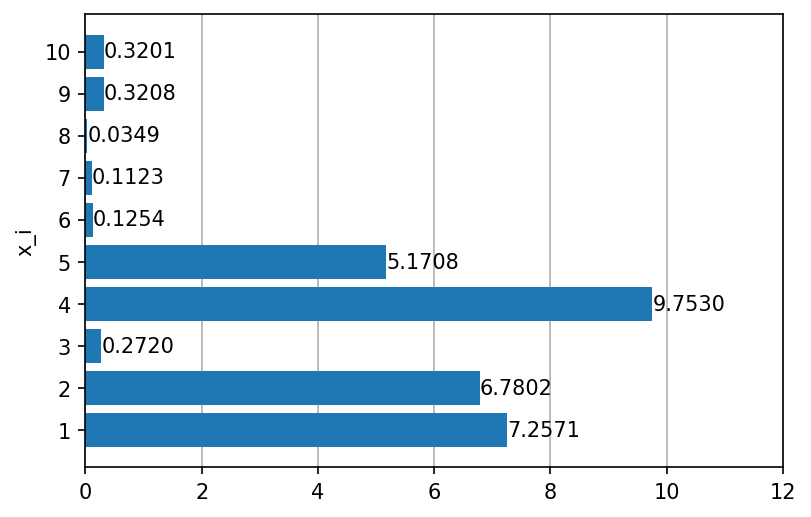

In [8]:
fig, ax = plt.subplots(dpi=150)
y_pos = list(range(1, 11))
coefs = abs(linregr.coef_)

bars = ax.barh(y_pos, coefs, label = "x coefficients")

ax.yaxis.set_ticks(y_pos)
ax.set_xbound(0, 12)
ax.set_ylabel('x_i')
ax.bar_label(bars, fmt = '%.4f')
ax.grid(axis='x')
ax.set_axisbelow(True)

plt.show()

In [23]:
est = sm.OLS(data_y, data_x)
est = est.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              4030.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:12:13   Log-Likelihood:                         -2310.6
No. Observations:                1000   AIC:                                      4641.
Df Residuals:                     990   BIC:                                      4690.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Importance of each variable is defined by the t-test. As we can see, the most important to least are: x4, x1, x2, x5, x6, x8, x10, x3, x9, x7.

Let's calculate the quality measures of our model.

In [9]:
y_predict = linregr.predict(data_x_test)

mse = mean_squared_error(data_y_test, y_predict)
r2 = r2_score(data_y_test, y_predict)

mse, r2

(5.082966795116612, 0.7152399554556519)

We use the test batch of our data and use it to predict the outcome with our linear regression model. The Mean Squared Error is 5.08, R-squared is 0.71. R-squared value tells us that the precision of our model is quite average.

Our linear regression model used monomials of first degree only.
To enhance the results, we can use different methods. For example, we can consecutively exclude the least important values of or model, using the F-test to determine the increment in R-squared until we get satisfying results. Or we can use different regression model, such as Lasso and elastic net. But since our x_i values are seem to be evenly distribured and y seems to be distributed normally, we can suggest that we need to use a polynomial of higher degree, knowing the fact that curvature indicates degree of a polynomial higher than one.

But first, we can try to make the existing model batter. Let's consider the fact that y is always integer. We can round up our prediction results and see if it makes the model better.

In [10]:
y_predict_int = y_predict.round()

mse_int = mean_squared_error(data_y_test, y_predict_int)
r2_int = r2_score(data_y_test, y_predict_int)

mse_int, r2_int

(4.84, 0.7288515406162466)

The results are a bit better, but are still averge.

To perfect existing model we could also use machine learning methods, such as gradient boosting.

In [11]:
gradient = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 4, learning_rate = 0.01)

In [12]:
gradient.fit(data_x_regr, data_y_regr)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

In [13]:
mse_g = mean_squared_error(data_y_test, gradient.predict(data_x_test))
r2_g = r2_score(data_y_test, gradient.predict(data_x_test))

In [14]:
mse_g, r2_g

(1.8902019482007382, 0.8941063334341324)

Now the predictions of our model are significantly better. With R-squared being approximately 0.9 we can say that the model has a good quality.

Finally, we should try build a new higher-degree linear regression model.

In [15]:
linreg_3 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', linear_model.LinearRegression(fit_intercept=False))])
linreg_3 = linreg_3.fit(data_x_regr, data_y_regr)

mse_lr3 = mean_squared_error(data_y_test, linreg_3.predict(data_x_test))
r2_lr3 = r2_score(data_y_test, linreg_3.predict(data_x_test))

mse_lr3, r2_lr3

(0.13768627559522606, 0.9922864831599313)

As we suggested earlier, the polynomial of higher degree gave us better results. Best results of a model achieved at degree = 3.
With R-squared being 0.99 we can say that this linear regression model discovered almost functional dependance between y and x_i, and arguably the best model for this data.